In [20]:

import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# Mount Your Drive 
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
dirname = '/content/drive/My Drive/Research/mobile-cellular-subscriptions-per-100-people.csv'

In [4]:

import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [6]:
# Load Data
data = pd.read_csv('/content/drive/My Drive/mobile-cellular-subscriptions-per-100-people.csv')

In [ ]:
import pandas_profiling as pp
import numpy as np

In [7]:

data.head()

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
0,Afghanistan,AFG,1960,0.0
1,Afghanistan,AFG,1965,0.0
2,Afghanistan,AFG,1970,0.0
3,Afghanistan,AFG,1975,0.0
4,Afghanistan,AFG,1976,0.0


In [8]:

data.head(10)

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
0,Afghanistan,AFG,1960,0.0
1,Afghanistan,AFG,1965,0.0
2,Afghanistan,AFG,1970,0.0
3,Afghanistan,AFG,1975,0.0
4,Afghanistan,AFG,1976,0.0
5,Afghanistan,AFG,1977,0.0
6,Afghanistan,AFG,1978,0.0
7,Afghanistan,AFG,1979,0.0
8,Afghanistan,AFG,1980,0.0
9,Afghanistan,AFG,1981,0.0


In [10]:

data.tail()

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
11890,Zimbabwe,ZWE,2015,92.347105
11891,Zimbabwe,ZWE,2016,91.793458
11892,Zimbabwe,ZWE,2017,98.985073
11893,Zimbabwe,ZWE,2018,89.404869
11894,Zimbabwe,ZWE,2019,90.102290


In [11]:

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          11895 non-null  object 
 1   Code                                            9645 non-null   object 
 2   Year                                            11895 non-null  int64  
 3   Mobile cellular subscriptions (per 100 people)  11895 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 371.8+ KB


In [12]:

data.describe(include='all')

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
count,11895,9645,11895.000000,11895.000000
unique,262,215,NaN,NaN
top,Afghanistan,AFG,NaN,NaN
freq,48,48,NaN,NaN
mean,NaN,NaN,1995.011938,30.839729
std,NaN,NaN,14.761475,47.433838
min,NaN,NaN,1960.000000,0.000000
25%,NaN,NaN,1984.000000,0.000000
50%,NaN,NaN,1996.000000,0.365290
75%,NaN,NaN,2007.000000,58.234904


In [13]:

data.corr()

,Year,Mobile cellular subscriptions (per 100 people)
Year,1.000000,0.732055
Mobile cellular subscriptions (per 100 people),0.732055,1.000000


In [14]:
data.columns

Index(['Entity', 'Code', 'Year',
       'Mobile cellular subscriptions (per 100 people)'],
      dtype='object')

In [15]:
data.shape

(11895, 4)

In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11895 entries, 0 to 11894
Data columns (total 4 columns):
 #   Column                                          Non-Null Count  Dtype  
---  ------                                          --------------  -----  
 0   Entity                                          11895 non-null  object 
 1   Code                                            9645 non-null   object 
 2   Year                                            11895 non-null  int64  
 3   Mobile cellular subscriptions (per 100 people)  11895 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 371.8+ KB


In [17]:
data.dtypes

Entity                                             object
Code                                               object
Year                                                int64
Mobile cellular subscriptions (per 100 people)    float64
dtype: object

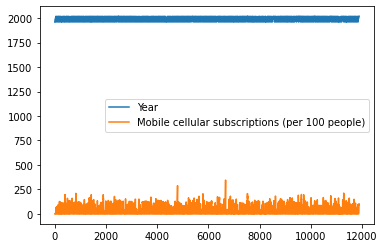

In [18]:
data1 = data.loc[:,["Entity", "Code", "Year", "Mobile cellular subscriptions (per 100 people)"]]
data1.plot()

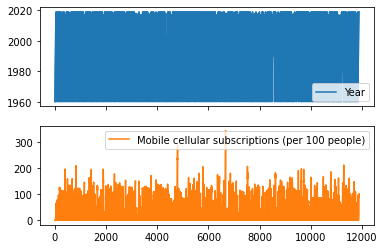

In [21]:
data1.plot(subplots = True)
plt.show()

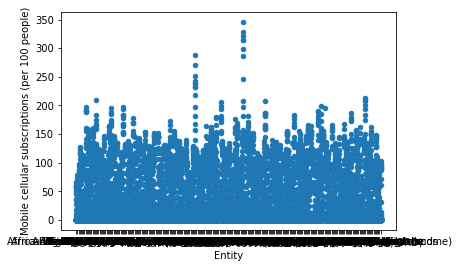

In [23]:
data1.plot(kind = "scatter",x="Entity",y = "Mobile cellular subscriptions (per 100 people)")
plt.show()

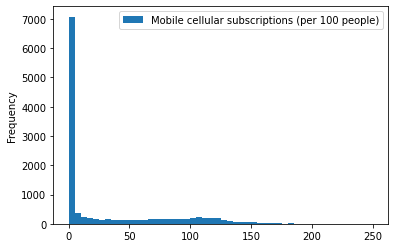

In [24]:

data1.plot(kind = "hist",y = "Mobile cellular subscriptions (per 100 people)",bins = 50,range= (0,250))

In [25]:
data.isnull()

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
0,False,False,False,False
1,False,False,False,False
2,False,False,False,False
3,False,False,False,False
4,False,False,False,False
...,...,...,...,...
11890,False,False,False,False
11891,False,False,False,False
11892,False,False,False,False
11893,False,False,False,False


In [26]:

missing_values_count = data.isnull().sum()

In [27]:

missing_values_count[0:10]

Entity                                               0
Code                                              2250
Year                                                 0
Mobile cellular subscriptions (per 100 people)       0
dtype: int64

In [28]:
x = data.iloc[:,:-1].values
y = data.iloc[:,-1].values

In [31]:

data.dropna()

,Entity,Code,Year,Mobile cellular subscriptions (per 100 people)
0,Afghanistan,AFG,1960,0.000000
1,Afghanistan,AFG,1965,0.000000
2,Afghanistan,AFG,1970,0.000000
3,Afghanistan,AFG,1975,0.000000
4,Afghanistan,AFG,1976,0.000000
...,...,...,...,...
11890,Zimbabwe,ZWE,2015,92.347105
11891,Zimbabwe,ZWE,2016,91.793458
11892,Zimbabwe,ZWE,2017,98.985073
11893,Zimbabwe,ZWE,2018,89.404869


In [32]:
# remove all columns with at least one missing value
columns_with_na_dropped = data.dropna(axis=1)
columns_with_na_dropped.head()

,Entity,Year,Mobile cellular subscriptions (per 100 people)
0,Afghanistan,1960,0.0
1,Afghanistan,1965,0.0
2,Afghanistan,1970,0.0
3,Afghanistan,1975,0.0
4,Afghanistan,1976,0.0


In [33]:
#split Data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=1)

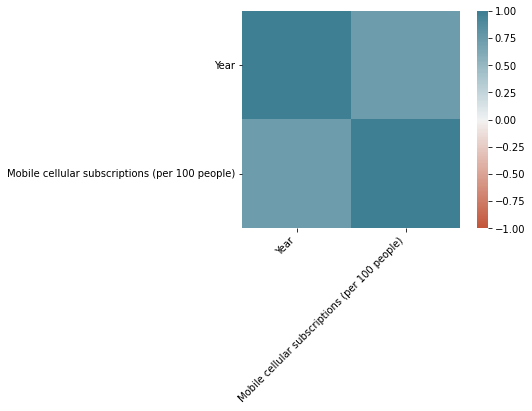

In [38]:
#correlation map
import seaborn as sns
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [37]:
data.columns[:-1]

Index(['Entity', 'Code', 'Year'], dtype='object')